In [77]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [173]:
sns.set(style="white", context="talk")
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

ONE      = (1, "One")
HUNDRED  = (100, "Hundred")
THOUSAND = (1000, "Thousand")
MILLION  = (1000000, "Million")
BILLION  = (1000000000, "Billion")
TRILLION = (1000000000000, "Trillion")

In [50]:
def get_all_results(first_link):
    items = []
    result = requests.get(first_link).json()
    if ('items' in result):
        items.extend(result['items'])
        paging = result['paging']
        while('next' in paging):
            next_link = paging['next']
            result = requests.get(next_link).json()
            items.extend(result['items'])
            paging = result['paging']
    return items

In [171]:
def plot_averages(averages):
    dividend = get_dividend(averages)
    averages["value"] = [x/dividend[0] for x in averages["value"]]
    plt.figure(figsize=(5, 5))
    ax = sns.barplot(x='company', y='value', palette="rocket", data=averages)
    ax.set_title("Average emissions", y=1.05, fontsize=BIGGER_SIZE)
    ax.xaxis.set_tick_params(labelsize=MEDIUM_SIZE)
    ax.yaxis.set_tick_params(labelsize=MEDIUM_SIZE)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.xlabel("Company", fontsize=MEDIUM_SIZE)
    ylabel = "Emissions (in tonnes)"
    if (dividend[1] != "One"):
        ylabel = "Emissions (in " + dividend[1] + " tonnes)"
    plt.ylabel(ylabel, fontsize=MEDIUM_SIZE)
    plt.show()

In [174]:
def get_dividend(data):
    max_val = data['value'].max()
    dividend = ONE
    if (max_val > TRILLION[0]):
        dividend = TRILLION
    elif (max_val > BILLION[0]):
        dividend = BILLION
    elif (max_val > MILLION[0]):
        dividend = MILLION
    elif (max_val > THOUSAND[0]):
        dividend = THOUSAND
    elif (max_val > HUNDRED[0]):
        dividend = HUNDRED
    return dividend

In [168]:
def plot_emissions(company_emissions, company_name):
    dividend = get_dividend(company_emissions)
    company_emissions["value"] = [x/dividend[0] for x in company_emissions["value"]]
    plt.figure(figsize=(5, 5))
    ax = sns.barplot(x='year', y='value', palette="vlag", data=company_emissions[["year","value"]])
    ax.set_title(company_name, y=1.05, fontsize=BIGGER_SIZE)
    ax.xaxis.set_tick_params(labelsize=MEDIUM_SIZE)
    ax.yaxis.set_tick_params(labelsize=MEDIUM_SIZE)
    plt.xlabel("Year", fontsize=MEDIUM_SIZE)
    ylabel = "Emissions (in tonnes)"
    if (dividend[1] != "One"):
        ylabel = "Emissions (in " + dividend[1] + " tonnes)"
    plt.ylabel(ylabel, fontsize=MEDIUM_SIZE)
    plt.show()

In [169]:
def plot_metric(result):
    emission_averages = []
    df = pd.DataFrame.from_dict(result)
    # Convert all values to float, errors return as NaN
    df["value"] = [pd.to_numeric(x, errors="coerce") for x in df["value"]]
    # Filter out all NaN
    df = df[df["value"].notna()]
    companies = df.company.unique()
    companies.sort()
    for company in companies:
        company_emissions = df[df["company"] == company].sort_values(by="year")
        emission_averages.append({"company" : company, "value" : company_emissions.value.mean()})
        plot_emissions(company_emissions, company)
    emission_averages_df = pd.DataFrame.from_dict(emission_averages)
    print(emission_averages_df[["company", "value"]])
    plot_averages(emission_averages_df)

In [156]:
scope1 = get_all_results("https://wikirate.org/Commons+Greenhouse_Gas_Emissions_Scope_1+Answer.json")

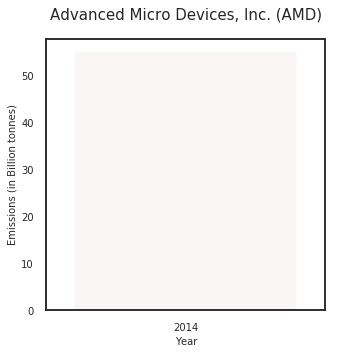

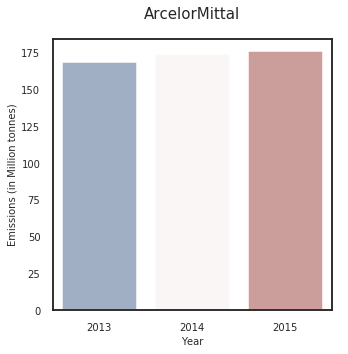

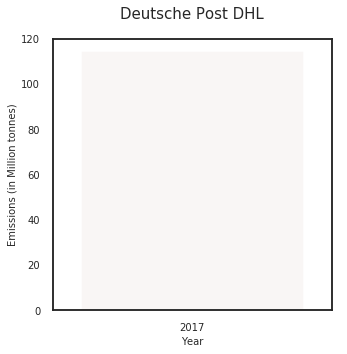

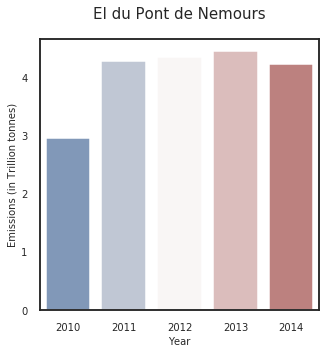

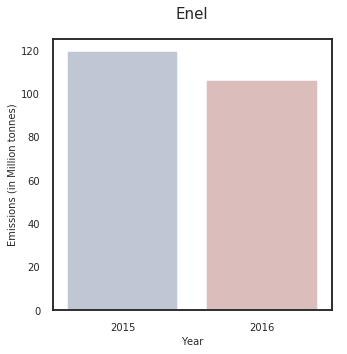

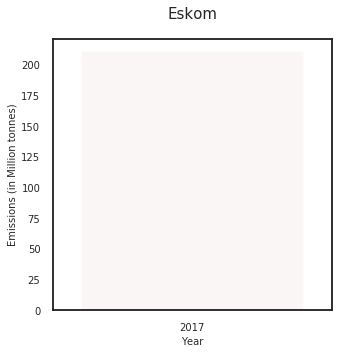

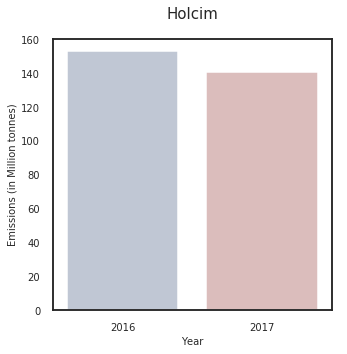

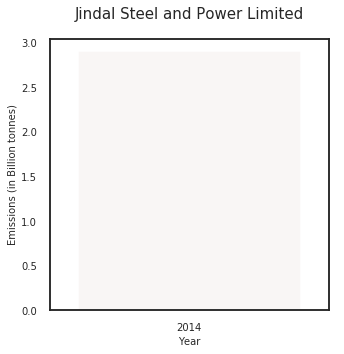

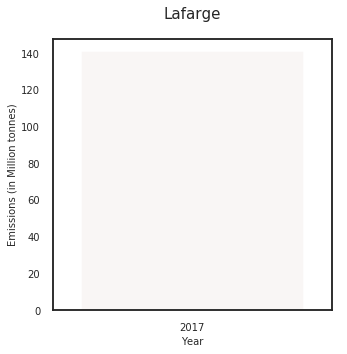

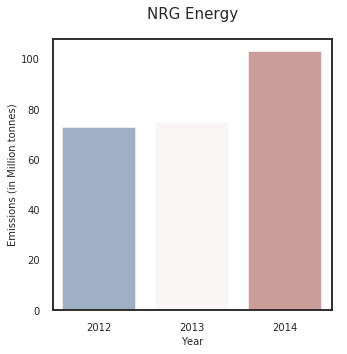

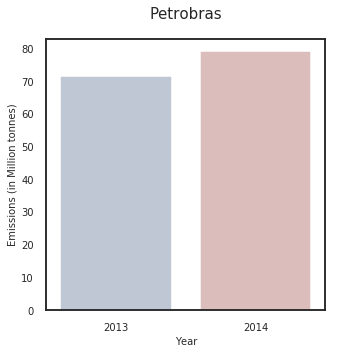

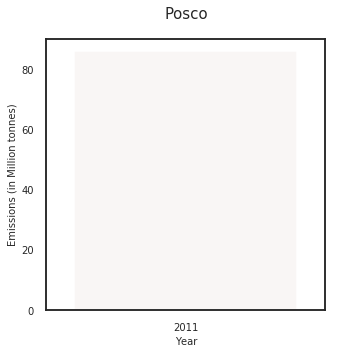

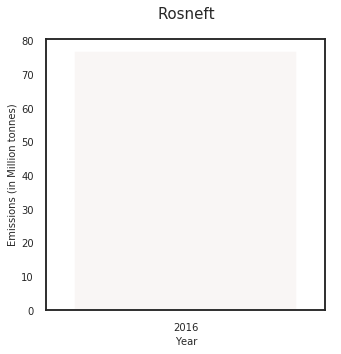

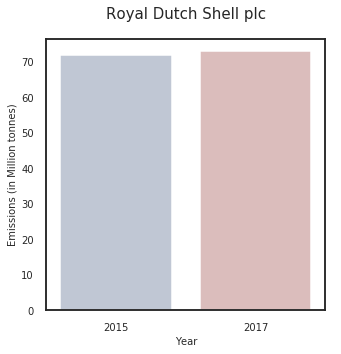

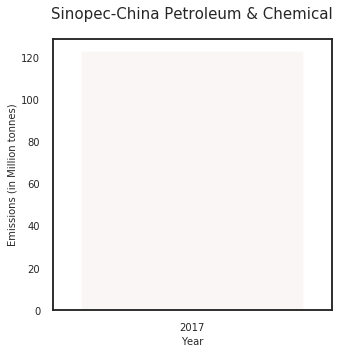

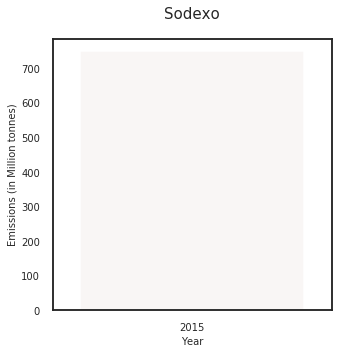

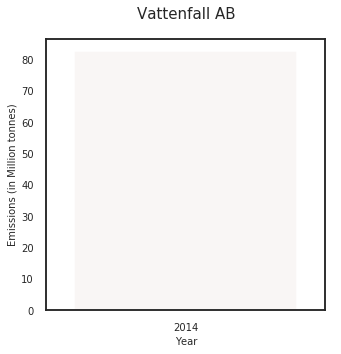

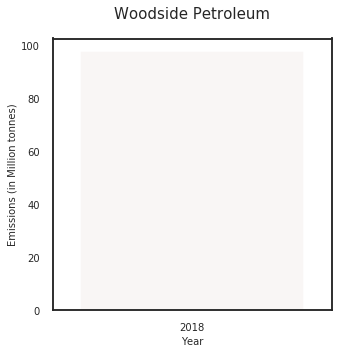

                               company         value
0   Advanced Micro Devices, Inc. (AMD)  5.512100e+10
1                        ArcelorMittal  1.730000e+08
2                    Deutsche Post DHL  1.144800e+08
3                EI du Pont de Nemours  4.060466e+12
4                                 Enel  1.129000e+08
5                                Eskom  2.111000e+08
6                               Holcim  1.470000e+08
7       Jindal Steel and Power Limited  2.906883e+09
8                              Lafarge  1.410000e+08
9                           NRG Energy  8.366667e+07
10                           Petrobras  7.535000e+07
11                               Posco  8.610600e+07
12                             Rosneft  7.690000e+07
13               Royal Dutch Shell plc  7.250000e+07
14  Sinopec-China Petroleum & Chemical  1.230500e+08
15                              Sodexo  7.498783e+08
16                       Vattenfall AB  8.270000e+07
17                  Woodside Petroleum  9.7670

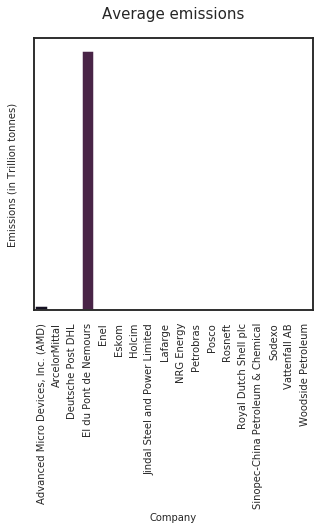

In [177]:
plot_metric(scope1[0:30]) # Because it takes forever to load all of them

In [178]:
scope2 = requests.get("https://wikirate.org/Commons+Greenhouse_Gas_Emissions_Scope_2+Answer.json").json()

In [ ]:
plot_metric(scope2)

In [179]:
scope3 = requests.get("https://wikirate.org/Global_Reporting_Initiative+Indirect_greenhouse_gas_GHG_emissions_Scope_3_G4_EN17_a+Answer.json").json()

In [ ]:
plot_metric(scope3)

In [180]:
scope_combined = requests.get("https://wikirate.org/Commons+Combined_Scope_1_2_and_3_Greenhouse_Gas_Emissions_GHG+Answer.json").json()

In [ ]:
plot_metric(scope_combined)